In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PolRel = pd.read_excel("Seshat_PolityRelationData.xlsx")
Data = pd.read_csv("Seshat Data.csv")
Parameters_and_Times = np.loadtxt("Parameters_and_Times.txt")
RelTimeDF = pd.read_csv("RelTime_TimeSeries_SPC1.csv", index_col = 0)
Parameters = Parameters_and_Times[:4]
Times = Parameters_and_Times[4:]
T = 5000

In [3]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape, scaled by T=5000
    return a / (1. + np.exp(-c * (x - d))) + b

In [4]:
RelTimeDF

,NGA,RelTime,SPC1
0,Deccan,-2400,0.155157
1,Deccan,-2300,0.155157
2,Deccan,-2200,0.155157
3,Deccan,-2100,0.155157
4,Deccan,-2000,0.155157
...,...,...,...
766,Yemeni Coastal Plain,1000,0.801720
767,Yemeni Coastal Plain,1100,0.797062
768,Yemeni Coastal Plain,1200,0.958307
769,Yemeni Coastal Plain,1300,0.568928


In [5]:
set(Data["NGA"]).issubset(set(PolRel["NGA"]))

True

In [6]:
# Discard superfluous NGAs
SubsetNGA = np.array(PolRel["NGA"].isin(set(Data["NGA"])))
PolRel = PolRel.iloc[SubsetNGA]


In [7]:
PolRel.head(50)

,NGA,PolID,Longform.Name,Polity.Start,Polity.End,Dupl,Section,Variable,Value.From,Value.To,Value.Date.From,Value.Date.To
13,Big Island Hawaii,Hawaii1,Hawaii I,1000.0,1200.0,n,General variables,succeeding (quasi)polity,Hawaii II,NaN,NaN,NaN
14,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,succeeding (quasi)polity,Hawaii III,NaN,NaN,NaN
15,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
16,Big Island Hawaii,Hawaii3,Hawaii III,1580.0,1778.0,n,General variables,succeeding (quasi)polity,Kingdom of Hawaii - Kamehameha Period,NaN,NaN,NaN
17,Cahokia,USMisEW,Cahokia - Early Woodland,-600.0,-150.0,n,General variables,succeeding (quasi)polity,Cahokia - Middle Woodland,NaN,NaN,NaN
18,Cahokia,USMisEW,Cahokia - Early Woodland,-600.0,-150.0,n,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
19,Cahokia,USMisMW,Cahokia - Middle Woodland,-150.0,300.0,n,General variables,succeeding (quasi)polity,Cahokia - Late Woodland I,NaN,NaN,NaN
20,Cahokia,USMisMW,Cahokia - Middle Woodland,-150.0,300.0,n,General variables,relationship to preceding (quasi)polity,Continuity,NaN,NaN,NaN
21,Cahokia,USMisRo,Cahokia - Late Woodland I,300.0,450.0,n,General variables,succeeding (quasi)polity,Cahokia - Late Woodland II,NaN,NaN,NaN
22,Cahokia,USMisRo,Cahokia - Late Woodland I,300.0,450.0,n,General variables,relationship to preceding (quasi)polity,Continuity,NaN,NaN,NaN


In [8]:
for i in list(set(PolRel["Dupl"])):
    print(i,sum(PolRel["Dupl"] == i))

n 596
y 103


In [9]:
# relationship to preceding (quasi)polity

for v in list(set(PolRel["Variable"])):
    print(v, sum(PolRel["Variable"]==v))

# Logical for Variable is the relationship
VR = PolRel["Variable"] == "relationship to preceding (quasi)polity"

Previous = PolRel.loc[np.logical_not(VR)]
Relationships = PolRel.loc[VR]

relationship to preceding (quasi)polity 335
succeeding (quasi)polity 364


In [10]:
Previous.head()

,NGA,PolID,Longform.Name,Polity.Start,Polity.End,Dupl,Section,Variable,Value.From,Value.To,Value.Date.From,Value.Date.To
13,Big Island Hawaii,Hawaii1,Hawaii I,1000.0,1200.0,n,General variables,succeeding (quasi)polity,Hawaii II,NaN,NaN,NaN
14,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,succeeding (quasi)polity,Hawaii III,NaN,NaN,NaN
16,Big Island Hawaii,Hawaii3,Hawaii III,1580.0,1778.0,n,General variables,succeeding (quasi)polity,Kingdom of Hawaii - Kamehameha Period,NaN,NaN,NaN
17,Cahokia,USMisEW,Cahokia - Early Woodland,-600.0,-150.0,n,General variables,succeeding (quasi)polity,Cahokia - Middle Woodland,NaN,NaN,NaN
19,Cahokia,USMisMW,Cahokia - Middle Woodland,-150.0,300.0,n,General variables,succeeding (quasi)polity,Cahokia - Late Woodland I,NaN,NaN,NaN


In [11]:
Relationships.head()

,NGA,PolID,Longform.Name,Polity.Start,Polity.End,Dupl,Section,Variable,Value.From,Value.To,Value.Date.From,Value.Date.To
15,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
18,Cahokia,USMisEW,Cahokia - Early Woodland,-600.0,-150.0,n,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
20,Cahokia,USMisMW,Cahokia - Middle Woodland,-150.0,300.0,n,General variables,relationship to preceding (quasi)polity,Continuity,NaN,NaN,NaN
22,Cahokia,USMisRo,Cahokia - Late Woodland I,300.0,450.0,n,General variables,relationship to preceding (quasi)polity,Continuity,NaN,NaN,NaN
23,Cahokia,USMisMu,Cahokia - Late Woodland II,450.0,600.0,n,General variables,relationship to preceding (quasi)polity,Continuity,NaN,NaN,NaN


In [12]:
for val in list(set(Relationships["Value.From"])):
    print(val, sum(Relationships["Value.From"]==val) )
                

Continuity 9
not applicable 2
continuity 228
vassalage 1
elite migration 40
indigenous revolt 1
cultural assimilation 25
contination 1
continunity 4
population migration 13
replacement 1
continuation 7
suspected unknown 2
Continuation 1


In [13]:
Relationships["Value.From"].replace("Continuation", "continuity", inplace = True)
Relationships["Value.From"].replace("continuation", "continuity", inplace = True)
Relationships["Value.From"].replace("continunity", "continuity", inplace = True)
Relationships["Value.From"].replace("contination", "continuity", inplace = True)
Relationships["Value.From"].replace("Continuity", "continuity", inplace = True)

                
for val in list(set(Relationships["Value.From"])):
    if val != "continuity":
        Relationships["Value.From"].replace(val, "non-continuity", inplace = True)

for val in list(set(Relationships["Value.From"])):
    print(val, sum(Relationships["Value.From"]==val) )    

continuity 250
non-continuity 85


C:\Users\Tobias\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
PolRel.loc[PolRel["Dupl"] == "y"].iloc[51:100]

,NGA,PolID,Longform.Name,Polity.Start,Polity.End,Dupl,Section,Variable,Value.From,Value.To,Value.Date.From,Value.Date.To
546,Paris Basin,ItRomPr,Roman Empire - Principate,-31.0,284.0,y,General variables,succeeding (quasi)polity,Roman Empire - Dominate,NaN,NaN,NaN
547,Paris Basin,ItRomPr,Roman Empire - Principate,-31.0,284.0,y,General variables,succeeding (quasi)polity,Roman Empire - Dominate,NaN,NaN,NaN
548,Paris Basin,ItRomPr,Roman Empire - Principate,-31.0,284.0,y,General variables,succeeding (quasi)polity,Roman Empire - Dominate,NaN,NaN,NaN
549,Paris Basin,ItRomPr,Roman Empire - Principate,-31.0,284.0,y,General variables,succeeding (quasi)polity,Roman Empire - Dominate,NaN,NaN,NaN
550,Paris Basin,TrRomDm,Roman Empire - Dominate,285.0,394.0,y,General variables,succeeding (quasi)polity,Western Roman Empire - Late Antiquity,NaN,NaN,NaN
551,Paris Basin,TrRomDm,Roman Empire - Dominate,285.0,394.0,y,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
581,Sogdiana,IrAchae,Achaemenid Empire,-550.0,-331.0,y,General variables,succeeding (quasi)polity,Macedonian Empire,NaN,NaN,NaN
582,Sogdiana,IrAchae,Achaemenid Empire,-550.0,-331.0,y,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
583,Sogdiana,IrSeleu,Seleucid Empire,-312.0,-63.0,y,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
584,Sogdiana,IrSeleu,Seleucid Empire,-312.0,-63.0,y,General variables,succeeding (quasi)polity,Parthian Empire I,NaN,NaN,NaN


In [15]:
for n in list(set(PolRel["NGA"])):
    print(PolRel.loc[PolRel["NGA"]==n])

        NGA    PolID                          Longform.Name  Polity.Start  \
361  Latium  ItLatCA                    Latium - Copper Age       -3600.0   
362  Latium  ItLatCA                    Latium - Copper Age       -3600.0   
363  Latium  ItLatBA                    Latium - Bronze Age       -1800.0   
364  Latium  ItLatBA                    Latium - Bronze Age       -1800.0   
365  Latium  ItLatIA                      Latium - Iron Age       -1000.0   
366  Latium  ItLatIA                      Latium - Iron Age       -1000.0   
367  Latium  ItRomRg                          Roman Kingdom        -716.0   
368  Latium  ItRomRg                          Roman Kingdom        -716.0   
369  Latium  ItRomER                         Roman Republic        -509.0   
370  Latium  ItRomER                         Roman Republic        -509.0   
371  Latium  ItRomMR                  Middle Roman Republic        -264.0   
372  Latium  ItRomMR                  Middle Roman Republic        -264.0   

             NGA    PolID                     Longform.Name  Polity.Start  \
286  Konya Plain  TrNeoER     Konya Plain - Early Neolithic       -9600.0   
287  Konya Plain  TrNeoCR   Konya Plain - Ceramic Neolithic       -7000.0   
288  Konya Plain  TrNeoLT      Konya Plain - Late Neolithic       -6600.0   
289  Konya Plain  TrClcER  Konya Plain - Early Chalcolithic       -6000.0   
290  Konya Plain  TrClcER  Konya Plain - Early Chalcolithic       -6000.0   
..           ...      ...                               ...           ...   
356  Konya Plain  TrOttm4                Ottoman Empire III        1683.0   
357  Konya Plain  TrOttm4                Ottoman Empire III        1683.0   
358  Konya Plain  TrOttm4                Ottoman Empire III        1683.0   
359  Konya Plain  TrOttm4                Ottoman Empire III        1683.0   
360  Konya Plain  TrOttm5                 Ottoman Empire IV        1839.0   

     Polity.End Dupl            Section  \
286     -7000.0    n  General va

       NGA    PolID                  Longform.Name  Polity.Start  Polity.End  \
134  Cuzco  PeCuzLF         Cuzco - Late Formative        -500.0       200.0   
135  Cuzco  PeCuzLF         Cuzco - Late Formative        -500.0       200.0   
136  Cuzco  PeCuzE1   Cuzco - Early Intermediate I         200.0       499.0   
137  Cuzco  PeCuzE1   Cuzco - Early Intermediate I         200.0       499.0   
138  Cuzco  PeCuzE2  Cuzco - Early Intermediate II         500.0       649.0   
139  Cuzco  PeCuzE2  Cuzco - Early Intermediate II         500.0       649.0   
140  Cuzco  PeCuzE2  Cuzco - Early Intermediate II         500.0       649.0   
141  Cuzco  PeWari*                    Wari Empire         650.0       999.0   
142  Cuzco  PeWari*                    Wari Empire         650.0       999.0   
143  Cuzco  PeWari*                    Wari Empire         650.0       999.0   
144  Cuzco  PeCuzL1    Cuzco - Late Intermediate I        1000.0      1250.0   
145  Cuzco  PeCuzL1    Cuzco - Late Inte

          NGA    PolID                  Longform.Name  Polity.Start  \
574  Sogdiana  TjSaraz                         Sarazm       -3500.0   
575  Sogdiana  KzAndro                      Andronovo       -1800.0   
576  Sogdiana  UzKok01                      Koktepe I       -1400.0   
577  Sogdiana  UzKhw01               Ancient Khwarazm       -1000.0   
578  Sogdiana  UzKhw01               Ancient Khwarazm       -1000.0   
579  Sogdiana  UzKhw01               Ancient Khwarazm       -1000.0   
580  Sogdiana  UzKok02                     Koktepe II        -750.0   
581  Sogdiana  IrAchae              Achaemenid Empire        -550.0   
582  Sogdiana  IrAchae              Achaemenid Empire        -550.0   
583  Sogdiana  IrSeleu                Seleucid Empire        -312.0   
584  Sogdiana  IrSeleu                Seleucid Empire        -312.0   
585  Sogdiana  AfGrBct         Greco-Bactrian Kingdom        -256.0   
586  Sogdiana  AfGrBct         Greco-Bactrian Kingdom        -256.0   
587  S

In [16]:
CleanRel = pd.concat((Previous,Relationships), sort=False).sort_index()

In [17]:
CleanRel.head()

,NGA,PolID,Longform.Name,Polity.Start,Polity.End,Dupl,Section,Variable,Value.From,Value.To,Value.Date.From,Value.Date.To
13,Big Island Hawaii,Hawaii1,Hawaii I,1000.0,1200.0,n,General variables,succeeding (quasi)polity,Hawaii II,NaN,NaN,NaN
14,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,succeeding (quasi)polity,Hawaii III,NaN,NaN,NaN
15,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
16,Big Island Hawaii,Hawaii3,Hawaii III,1580.0,1778.0,n,General variables,succeeding (quasi)polity,Kingdom of Hawaii - Kamehameha Period,NaN,NaN,NaN
17,Cahokia,USMisEW,Cahokia - Early Woodland,-600.0,-150.0,n,General variables,succeeding (quasi)polity,Cahokia - Middle Woodland,NaN,NaN,NaN


In [18]:
TimeZero = pd.read_csv("TimeZero.csv")
TimeZero.head()

,Unnamed: 0,Deccan,Sogdiana,Ghanaian Coast,Konya Plain,Latium,Paris Basin,Orkhon Valley,Middle Yellow River Valley,Kansai,Yemeni Coastal Plain,Upper Egypt,Niger Inland Delta,Cambodian Basin,Susiana,Central Java,Iceland,Kachi Plain,Cuzco
0,T0,-300,-500,1800,-2000,-700,-200,500,-1800,400,400,-3100,1000,300,-3700,800,1300,-2500,1400


In [19]:

# Again Discard superfluous NGAs
SubsetNGA_2 = np.array(Relationships["NGA"].isin(set(TimeZero.columns)))
Relationships = Relationships.iloc[SubsetNGA_2]

set(Relationships["NGA"]).issubset( set(TimeZero.columns))


True

In [20]:
Relationships["Polity.End.Scaled"] = 0

# iterate over all rows in the DF
for i in range(Relationships.shape[0]):
    n = Relationships["NGA"].iloc[i]
    
    # for this NGA: read its Time_Zero from the TimeZero.csv
    T_zero = TimeZero[n]
    # Shift the time accordingly
    Relationships["Polity.End.Scaled"].iloc[i] = Relationships["Polity.End"].iloc[i] - T_zero
    

C:\Users\Tobias\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


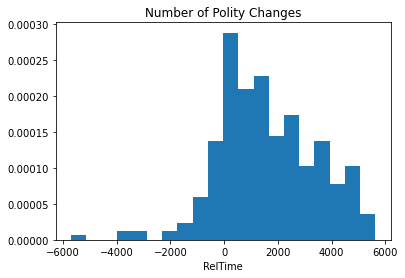

In [21]:
plt.hist(Relationships["Polity.End.Scaled"], bins =20, density = True)
plt.title("Number of Polity Changes")
plt.xlabel("RelTime")
plt.show()

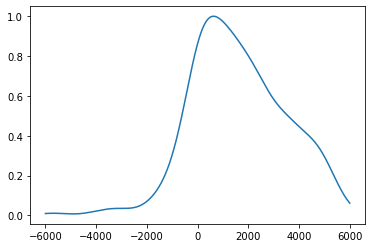

In [22]:
from scipy.stats import gaussian_kde
KDE = gaussian_kde(Relationships["Polity.End.Scaled"])
time_range = np.arange(-6000,6000,10)
KDE_t = KDE(time_range)
plt.plot(time_range, KDE_t / max(KDE_t))
plt.show()

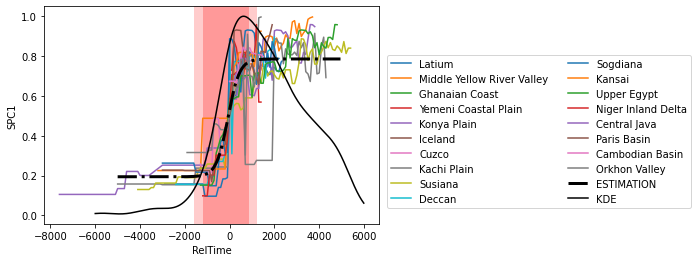

In [23]:
# Time Series Data fpr Reltime vs. SPC1
for N in list(set(RelTimeDF["NGA"])):
    DF = RelTimeDF[RelTimeDF["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"], label=N)
    
# Interpolation
x_show = np.arange(-1,1,0.01)    
y_hat = f(x_show, Parameters[0], Parameters[1], Parameters[2], Parameters[3])
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # scaled by T
plt.ylabel("SPC1")
plt.xlabel("RelTime")

# Denote the Regions of fast growth
plt.axvspan(Times[1], Times[2], facecolor='r', alpha=0.4)
plt.axvspan(Times[2], Times[3], facecolor='r', alpha=0.2)
plt.axvspan(Times[0], Times[1], facecolor='r', alpha=0.2)

# KDE of the polity changes
plt.plot(time_range, KDE_t / max(KDE_t), c="k", label="KDE")

plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)


plt.show()

## Normalise the Number of Polity Changes

Divide it by the number of existing polities at RelTime T, because if there are only few polities at an early time, we would also only expect few possible polity changes.

In [24]:
T_min, T_max = min(RelTimeDF["RelTime"]), max(RelTimeDF["RelTime"])

In [25]:
NumberPol = pd.DataFrame(columns=["RelTime", "NumberPol"])
for t in np.arange(T_min, T_max+100, 100):
    #print(t)
    #print(sum(RelTimeDF["RelTime"]==t))
    NumberPol = pd.concat([NumberPol,
                         pd.DataFrame({"RelTime": [t],
                                      "NumberPol": [sum(RelTimeDF["RelTime"]==t)]})])
NumberPol

,RelTime,NumberPol
0,-7600,1
0,-7500,1
0,-7400,1
0,-7300,1
0,-7200,1
...,...,...
0,5000,1
0,5100,1
0,5200,1
0,5300,1


In [26]:
NumberPol["NumberPol"].loc[NumberPol["RelTime"]==1000]

0    13
Name: NumberPol, dtype: object

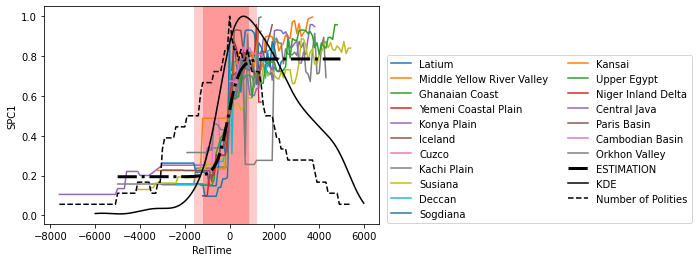

In [27]:
# Time Series Data fpr Reltime vs. SPC1
for N in list(set(RelTimeDF["NGA"])):
    DF = RelTimeDF[RelTimeDF["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"], label=N)
    
# Interpolation
x_show = np.arange(-1,1,0.01)    
y_hat = f(x_show, Parameters[0], Parameters[1], Parameters[2], Parameters[3])
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # scaled by T
plt.ylabel("SPC1")
plt.xlabel("RelTime")

# Denote the Regions of fast growth
plt.axvspan(Times[1], Times[2], facecolor='r', alpha=0.4)
plt.axvspan(Times[2], Times[3], facecolor='r', alpha=0.2)
plt.axvspan(Times[0], Times[1], facecolor='r', alpha=0.2)

# KDE of the polity changes
plt.plot(time_range, KDE_t / max(KDE_t), c="k", label="KDE")

plt.plot(NumberPol["RelTime"], NumberPol["NumberPol"]/np.max(NumberPol["NumberPol"]), "--", c="k",
        label="Number of Polities")

plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)

plt.show()

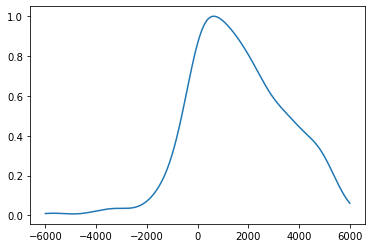

In [28]:
Changes_round = Relationships["Polity.End.Scaled"].round(-2)
KDE_round = gaussian_kde(Changes_round)
time_range = np.arange(-6000,6000,10)
kde_round = KDE_round(time_range)
plt.plot(time_range, kde_round / max(kde_round))
plt.show()

In [29]:
# take the rounded changes in polity
# and construct a frequency table
Changes_FrequencyTable = pd.DataFrame(columns = np.arange(T_min, T_max+100, 100))

for t in Changes_FrequencyTable.columns:
    Changes_FrequencyTable[int(t)] = sum(Changes_round==t)

print(Changes_FrequencyTable)


Empty DataFrame
Columns: [-7600, -7500, -7400, -7300, -7200, -7100, -7000, -6900, -6800, -6700, -6600, -6500, -6400, -6300, -6200, -6100, -6000, -5900, -5800, -5700, -5600, -5500, -5400, -5300, -5200, -5100, -5000, -4900, -4800, -4700, -4600, -4500, -4400, -4300, -4200, -4100, -4000, -3900, -3800, -3700, -3600, -3500, -3400, -3300, -3200, -3100, -3000, -2900, -2800, -2700, -2600, -2500, -2400, -2300, -2200, -2100, -2000, -1900, -1800, -1700, -1600, -1500, -1400, -1300, -1200, -1100, -1000, -900, -800, -700, -600, -500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, ...]
Index: []

[0 rows x 131 columns]


In [30]:
Changes_FrequencyTable = pd.DataFrame( columns = ["RelTime", "NumberChanges", "NormedChanges"])

for t in np.arange(T_min, T_max+100, 100):
    Number_of_Polities = NumberPol["NumberPol"].loc[NumberPol["RelTime"]==t][0] # number of polities at time t
    Changes_FrequencyTable = pd.concat((Changes_FrequencyTable,
                                       pd.DataFrame(data={"RelTime": [t],
                                                         "NumberChanges": [sum(Changes_round==t)],
                                                         "NormedChanges": [sum(Changes_round==t) / Number_of_Polities]})))
    
print(Changes_FrequencyTable)

   RelTime NumberChanges  NormedChanges
0    -7600             0            0.0
0    -7500             0            0.0
0    -7400             0            0.0
0    -7300             0            0.0
0    -7200             0            0.0
..     ...           ...            ...
0     5000             4            4.0
0     5100             0            0.0
0     5200             3            3.0
0     5300             0            0.0
0     5400             2            2.0

[131 rows x 3 columns]


In [31]:
Changes_round

42      200.0
44      300.0
46      500.0
49      800.0
51      900.0
        ...  
830    4800.0
834    4900.0
858    1400.0
861    1400.0
862    1500.0
Name: Polity.End.Scaled, Length: 294, dtype: float64

In [32]:
Changes_FrequencyTable

,RelTime,NumberChanges,NormedChanges
0,-7600,0,0.0
0,-7500,0,0.0
0,-7400,0,0.0
0,-7300,0,0.0
0,-7200,0,0.0
...,...,...,...
0,5000,4,4.0
0,5100,0,0.0
0,5200,3,3.0
0,5300,0,0.0


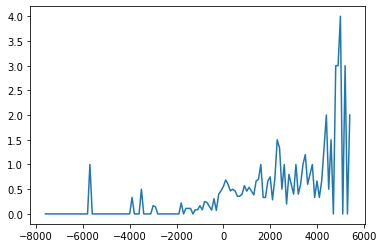

In [37]:
plt.plot(Changes_FrequencyTable["RelTime"],Changes_FrequencyTable["NormedChanges"], label ="Normed")


[]

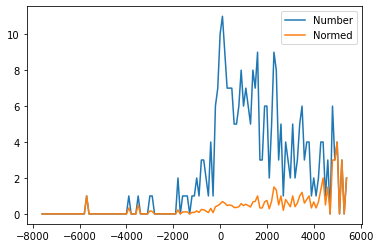

In [36]:
plt.plot(Changes_FrequencyTable["RelTime"],Changes_FrequencyTable["NumberChanges"], label="Number")
plt.plot(Changes_FrequencyTable["RelTime"],Changes_FrequencyTable["NormedChanges"], label ="Normed")
plt.legend()
plt.plot()

In [34]:
Changes_FrequencyTable

,RelTime,NumberChanges,NormedChanges
0,-7600,0,0.0
0,-7500,0,0.0
0,-7400,0,0.0
0,-7300,0,0.0
0,-7200,0,0.0
...,...,...,...
0,5000,4,4.0
0,5100,0,0.0
0,5200,3,3.0
0,5300,0,0.0


In [35]:
for i in Changes_round:
    print(i,sum(Changes_round == i))

200.0 9
300.0 7
500.0 7
800.0 6
900.0 8
1100.0 7
1300.0 5
1500.0 7
1600.0 9
200.0 9
400.0 7
700.0 5
900.0 8
-1200.0 1
-900.0 1
-800.0 3
-800.0 3
-400.0 4
-400.0 4
-200.0 6
-200.0 6
0.0 10
100.0 11
100.0 11
100.0 11
300.0 7
0.0 10
100.0 11
800.0 6
1100.0 7
1300.0 5
1500.0 7
1600.0 9
1600.0 9
1900.0 6
2200.0 5
2100.0 2
-100.0 7
-100.0 7
100.0 11
-0.0 10
100.0 11
-3000.0 1
-1500.0 1
-700.0 3
0.0 10
400.0 7
4300.0 4
2000.0 6
2200.0 5
2300.0 9
2500.0 3
2800.0 4
3000.0 2
3100.0 5
3100.0 5
3200.0 2
3400.0 5
4000.0 2
4400.0 4
4300.0 4
-5700.0 1
-3900.0 1
-2900.0 1
-1600.0 1
-700.0 3
-200.0 6
100.0 11
300.0 7
800.0 6
900.0 8
1100.0 7
1200.0 6
1200.0 6
1500.0 7
-3500.0 1
-1000.0 2
0.0 10
0.0 10
300.0 7
600.0 5
800.0 6
1100.0 7
1300.0 5
1300.0 5
1700.0 3
1700.0 3
1900.0 6
1900.0 6
2300.0 9
2300.0 9
2300.0 9
2300.0 9
2300.0 9
2400.0 8
2400.0 8
2400.0 8
2400.0 8
2400.0 8
2600.0 5
2600.0 5
2900.0 3
3100.0 5
3300.0 3
3300.0 3
3300.0 3
3400.0 5
3500.0 6
3700.0 4
3800.0 4
3800.0 4
3900.0 1
-1100.0 1
-2